# **confidence intervals**

# **Step 1: Imports**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Load the dataset


In [3]:

data = pd.read_csv(r"c:/Users/hp/Downloads/c4_epa_air_quality.csv")
data.head(2)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5


In [10]:
data.shape

(260, 8)

## **Step 2: Data exploration**

In [11]:


print("Use describe() to summarize AQI")
print(data.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(data['state_name'].value_counts())

Use describe() to summarize AQI
        state_name  county_name      city_name local_site_name  \
count          260          260            260             257   
unique          52          149            190             253   
top     California  Los Angeles  Not in a city         Kapolei   
freq            66           14             21               2   
mean           NaN          NaN            NaN             NaN   
std            NaN          NaN            NaN             NaN   
min            NaN          NaN            NaN             NaN   
25%            NaN          NaN            NaN             NaN   
50%            NaN          NaN            NaN             NaN   
75%            NaN          NaN            NaN             NaN   
max            NaN          NaN            NaN             NaN   

         parameter_name   units_of_measure  arithmetic_mean         aqi  
count               260                260       260.000000  260.000000  
unique                1    

## **Step 3: Statistical tests**



In [12]:


rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']


aqi_rre = data[data['state_name'].isin(rre_states)]


aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) 

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


#  **boxplot visualization**

In [13]:

import seaborn as sns

<Axes: xlabel='state_name', ylabel='aqi'>

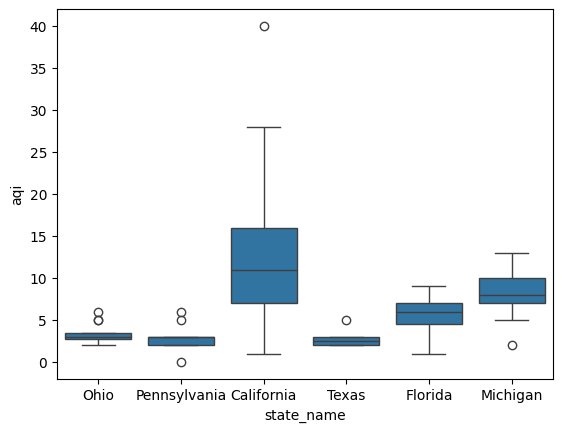

In [14]:

sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

# sample statistic



In [15]:


aqi_ca = data[data['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

np.float64(12.121212121212121)

# confidence level


In [16]:


confidence_level = 0.95
confidence_level

0.95

## Margin of error (ME)

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [17]:

z_value = 1.96

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)


margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


# interval



In [18]:


upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(np.float64(10.359719031551148), np.float64(13.882705210873095))

In [21]:
# Import stats from scipy.
from scipy import stats

# Step 4: Results and evaluation


In [ ]:

ci = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

print(ci)


(np.float64(10.359751399400034), np.float64(13.882672843024208))


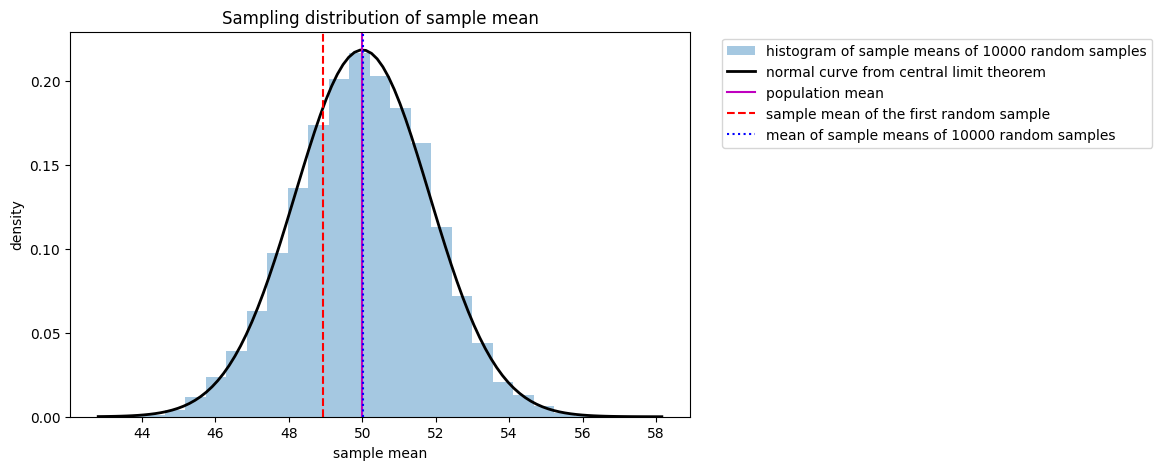

In [4]:

population_mean = 50
population_std = 10
sample_size = 30
num_samples = 10000

sample_means = []
for _ in range(num_samples):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    sample_means.append(np.mean(sample))

# Store in DataFrame
estimate_df = pd.DataFrame({'estimate': sample_means})


sample_mean = estimate_df['estimate'].iloc[0]   
mean_sample_means = estimate_df['estimate'].mean()  # mean of all sample means
standard_error = population_std / np.sqrt(sample_size)

#  Plot histogram + normal curve + reference lines
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, 
         label="histogram of sample means of 10000 random samples")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, population_mean, standard_error)

plt.plot(x, p, 'k', linewidth=2, label='normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle='solid', label='population mean')
plt.axvline(x=sample_mean, color='r', linestyle='--', label='sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle=':', label='mean of sample means of 10000 random samples')

plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.show()


**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).